In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect,func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
# get all tables
inspector_gadget = inspect(engine)
tables = inspector_gadget.get_table_names()
for table in tables:
    print(table)
    
    # get all columns in table
    columns = inspector_gadget.get_columns(table)
    for column in columns:
        print(column)
    print()

measurement
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}

station
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoi

In [68]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [8]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June.

# Ref prof Booth's code to extract the june month data using strftime 

june_temp_results = session.query(Measurement.date,Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "06").all()

In [9]:
len(june_temp_results)

1700

In [10]:
print(june_temp_results)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [11]:
#  3. Convert the June temperatures to a list.


june_temp = session.query(Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "06").all()
print(june_temp)

[(78.0,), (76.0,), (78.0,), (76.0,), (77.0,), (78.0,), (77.0,), (78.0,), (78.0,), (79.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (77.0,), (77.0,), (82.0,), (78.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (73.0,), (70.0,), (76.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (75.0,), (76.0,), (76.0,), (77.0,), (78.0,), (76.0,), (77.0,), (75.0,), (77.0,), (76.0,), (76.0,), (75.0,), (77.0,), (77.0,), (76.0,), (78.0,), (77.0,), (76.0,), (77.0,), (76.0,), (76.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (77.0,), (76.0,), (75.0,), (76.0,), (76.0,), (77.0,), (76.0,), (73.0,), (73.0,), (75.0,), (77.0,), (76.0,), (77.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (79.0,), (77.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (73.0,), (76.0,), (77.0,), (75.0,), (76.0,), (74.0,), 

In [12]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 

june_temp_df = pd.DataFrame(june_temp)

june_temp_df.head()


,0
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0


In [14]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,0
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [15]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temp_results = session.query(Measurement.date,Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "12").all()
print(dec_temp_results)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [16]:
# 7. Convert the December temperatures to a list.

dec_temp = session.query(Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "12").all()
print(dec_temp)

[(76.0,), (74.0,), (74.0,), (64.0,), (64.0,), (67.0,), (77.0,), (66.0,), (69.0,), (68.0,), (68.0,), (71.0,), (74.0,), (67.0,), (66.0,), (69.0,), (71.0,), (70.0,), (70.0,), (74.0,), (74.0,), (71.0,), (75.0,), (75.0,), (72.0,), (69.0,), (68.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (73.0,), (71.0,), (73.0,), (73.0,), (77.0,), (72.0,), (71.0,), (73.0,), (70.0,), (73.0,), (69.0,), (74.0,), (72.0,), (71.0,), (72.0,), (72.0,), (70.0,), (73.0,), (73.0,), (72.0,), (73.0,), (73.0,), (72.0,), (63.0,), (65.0,), (71.0,), (76.0,), (70.0,), (76.0,), (69.0,), (69.0,), (69.0,), (74.0,), (76.0,), (74.0,), (73.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (74.0,), (74.0,), (71.0,), (73.0,), (72.0,), (64.0,), (66.0,), (73.0,), (72.0,), (65.0,), (64.0,), (69.0,), (68.0,), (77.0,), (71.0,), (71.0,), (69.0,), (68.0,), (68.0,), (69.0,), (70.0,), (72.0,), (76.0,), (75.0,), (69.0,), (71.0,), (71.0,), (71.0,), (68.0,), (65.0,), (70.0,), (69.0,), (69.0,), (71.0,), (67.0,), (73.0,), (74.0,), (73.0,), 

In [17]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 

dec_temp_df = pd.DataFrame(dec_temp)
dec_temp_df.head()


,0
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0


In [18]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp_df.describe()

,0
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [ ]:
#Additional queries to compare temperature and precipitation

In [60]:
june_temp_additional = session.query(Measurement.prcp,Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "06").all()
print(june_temp_additional)

[(0.0, 78.0), (0.01, 76.0), (0.0, 78.0), (0.0, 76.0), (0.0, 77.0), (0.0, 78.0), (0.0, 77.0), (0.0, 78.0), (0.0, 78.0), (0.0, 79.0), (0.0, 78.0), (0.0, 78.0), (0.0, 78.0), (0.0, 77.0), (0.0, 78.0), (0.0, 78.0), (0.0, 77.0), (0.0, 77.0), (0.0, 82.0), (0.0, 78.0), (0.0, 78.0), (0.0, 78.0), (0.0, 78.0), (0.0, 78.0), (0.0, 77.0), (0.02, 76.0), (0.0, 78.0), (0.0, 78.0), (0.0, 78.0), (0.0, 78.0), (0.07, 77.0), (0.0, 78.0), (0.56, 73.0), (0.89, 70.0), (0.0, 76.0), (0.0, 77.0), (0.0, 77.0), (0.03, 77.0), (0.01, 77.0), (0.0, 78.0), (0.0, 77.0), (0.0, 77.0), (0.0, 78.0), (0.0, 78.0), (0.0, 77.0), (0.0, 78.0), (0.0, 78.0), (0.05, 75.0), (0.06, 76.0), (0.07, 76.0), (None, 77.0), (0.0, 78.0), (0.0, 76.0), (0.01, 77.0), (0.01, 75.0), (0.0, 77.0), (0.02, 76.0), (0.02, 76.0), (0.0, 75.0), (0.0, 77.0), (0.0, 77.0), (0.0, 76.0), (0.0, 78.0), (None, 77.0), (None, 76.0), (0.0, 77.0), (0.0, 76.0), (0.0, 76.0), (0.0, 77.0), (0.0, 77.0), (0.0, 78.0), (0.0, 77.0), (0.0, 77.0), (0.0, 77.0), (0.0, 76.0), (0.0, 7

In [61]:
june_temp_additional_df = pd.DataFrame(june_temp_additional)

In [62]:
june_temp_additional_df.describe()

,0,1
count,1574.000000,1700.000000
mean,0.136360,74.944118
std,0.335731,3.257417
min,0.000000,64.000000
25%,0.000000,73.000000
50%,0.020000,75.000000
75%,0.120000,77.000000
max,4.430000,85.000000


In [63]:
june_temp_additional_df.head()

,0,1
0,0.00,78.0
1,0.01,76.0
2,0.00,78.0
3,0.00,76.0
4,0.00,77.0


In [64]:
june_temp_additional_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1574 non-null   float64
 1   1       1700 non-null   float64
dtypes: float64(2)
memory usage: 26.7 KB


In [65]:
#Rename columns
june_temp_additional_df.columns = ['precp', 'temp']

In [66]:
june_temp_additional_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   precp   1574 non-null   float64
 1   temp    1700 non-null   float64
dtypes: float64(2)
memory usage: 26.7 KB


In [67]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

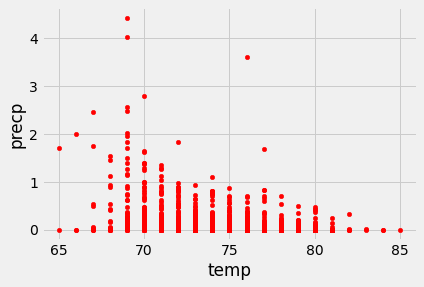

In [52]:
june_temp_additional_df.plot(kind='scatter',x='temp',y='precp',color='red')
plt.show()

In [53]:
dec_temp_additional = session.query(Measurement.prcp,Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "12").all()
print(dec_temp_additional)

[(0.04, 76.0), (0.0, 74.0), (0.0, 74.0), (0.0, 64.0), (0.0, 64.0), (0.0, 67.0), (0.0, 77.0), (1.58, 66.0), (0.77, 69.0), (0.0, 68.0), (0.0, 68.0), (0.0, 71.0), (0.0, 74.0), (0.0, 67.0), (0.0, 66.0), (0.0, 69.0), (1.4, 71.0), (0.0, 70.0), (0.0, 70.0), (None, 74.0), (0.13, 74.0), (0.55, 71.0), (0.06, 75.0), (0.01, 75.0), (0.0, 72.0), (0.03, 69.0), (0.08, 68.0), (0.0, 73.0), (0.0, 74.0), (0.0, 73.0), (0.0, 73.0), (0.0, 73.0), (0.0, 73.0), (0.13, 71.0), (0.07, 73.0), (0.07, 73.0), (0.08, 77.0), (0.4, 72.0), (0.7, 71.0), (0.0, 73.0), (0.01, 70.0), (0.07, 73.0), (0.02, 69.0), (0.15, 74.0), (0.02, 72.0), (0.18, 71.0), (0.03, 72.0), (0.04, 72.0), (0.1, 70.0), (0.03, 73.0), (0.0, 73.0), (0.0, 72.0), (0.0, 73.0), (0.0, 73.0), (0.0, 72.0), (0.01, 63.0), (0.0, 65.0), (0.0, 71.0), (0.0, 76.0), (0.2, 70.0), (0.01, 76.0), (None, 69.0), (None, 69.0), (0.0, 69.0), (0.0, 74.0), (0.0, 76.0), (0.0, 74.0), (0.0, 73.0), (0.14, 73.0), (0.09, 74.0), (0.01, 73.0), (0.02, 73.0), (0.02, 73.0), (0.12, 74.0), (0.0

In [54]:
dec_temp_additional_df = pd.DataFrame(dec_temp_additional)
dec_temp_additional_df.head()

,0,1
0,0.04,76.0
1,0.00,74.0
2,0.00,74.0
3,0.00,64.0
4,0.00,64.0


In [55]:
dec_temp_additional_df.columns = ['precp', 'temp']

In [56]:
dec_temp_additional_df.head()

,precp,temp
0,0.04,76.0
1,0.00,74.0
2,0.00,74.0
3,0.00,64.0
4,0.00,64.0


In [58]:
dec_temp_additional_df.describe()

,precp,temp
count,1405.000000,1517.000000
mean,0.216819,71.041529
std,0.541399,3.745920
min,0.000000,56.000000
25%,0.000000,69.000000
50%,0.030000,71.000000
75%,0.150000,74.000000
max,6.420000,83.000000


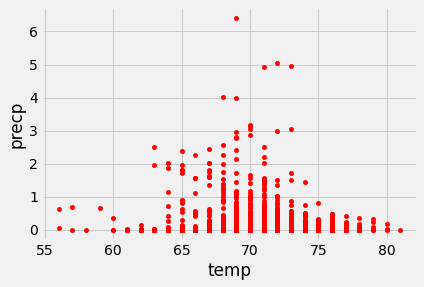

In [59]:
dec_temp_additional_df.plot(kind='scatter',x='temp',y='precp',color='red')
plt.show()